# Web Scraping Job Vacancies

In [1]:
# the data uploaded into my google drive so this below to create appproval to acess
# goole drive file access
from google.colab import drive
drive.mount('/content/drive')

# checking file list of existing drive location
!ls "/content/drive/My Drive/Data Science & Machine Learning 2025"

Mounted at /content/drive
 archive.zip
 Bank_data.csv
 Breast_cancer_dataset.csv
 BreastCancerPrediction
'Capstone Data Science'
'Cluster Analys Sosial.ipynb'
 Comparing-DBScan-HDBScan-v1.ipynb
 dataset.csv
 Decision-tree-classifier-drug-pred-v1.ipynb
 decision-tree-svm-ccFraud-v1.ipynb
 DV0101EN-Final-Assignment-Part1-v2.ipynb
 DV0101EN-Final-Assign-Part-2-Questions.py
'Evaluating Classification Models-v1.ipynb'
 FinalProject_AUSWeather.ipynb
'Github Project WebScraping.ipynb'
'House_Sales_in_King_Count_USA-20231003-1696291200.jupyterlite (1).ipynb'
 Jasman.docx
 jobstreet_jobs.csv
 jupyter-labs-webscraping.ipynb
 K-Means-Customer-Seg-v1.ipynb
 KNN-lab-v1.ipynb
'Life Expectancy Data.csv'
'Life Expectancy.ipynb'
'LINEAEReg 3.ipynb'
'Linear regression Biker Data.ipynb'
'Linear regression.ipynb'
' Linear regression Sales Data.ipynb'
 Logistic-Regression-v1.ipynb
 mining_data.csv
'Mining Quality Prediction.ipynb'
 ML-Pipelines-and-GridSearchCV-v1.ipynb
'model review.pdf'
 Mulitple-Linear-

As far as we are concerned, having a good job is an essential factor in life. Many of us hope to accelerate our careers, and understanding the current trends in job demand is a key step toward securing better opportunities.

At the beginning of 2025, I started practicing my skills in Data Science, particularly in Data Collection and Visualization, through online platforms such as Coursera, Udemy, and Kaggle. One project that I found both interesting and challenging—proposed by Coursera—is “Web Scraping Job Vacancies.”

I believe this project is valuable because jobs play a primary role in most people’s lives. It is especially relevant for job seekers in Indonesia to better understand the current labor market. I decided to share my work not only to practice and strengthen my abilities, but also in the hope of receiving feedback and insights from experts around the world.

## Step 1: Data Collection and Preparation


In [2]:
# Data handling and cleaning
import pandas as pd
import numpy as np

# Visualization libraries (commonly used for EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Web scraping essentials
import requests
from bs4 import BeautifulSoup

In [ ]:
# job_sites = {
#     # "Indeed": "https://id.indeed.com/jobs?q={keyword}&l={location}"
#     # "JobStreet": "https://www.jobstreet.co.id/id/job-search/{keyword}-jobs/{location}",
#     # "Glassdoor": "https://www.glassdoor.com/Job/{location}-{keyword}-jobs-SRCH_IL.0,7_IC{location_code}.htm",
#     # "JobsDB": "https://id.jobsdb.com/id/search-jobs/{keyword}/{location}",
#     # "Karir": "https://www.karir.com/search?q={keyword}&l={location}",
#     # "Kalibrr": "https://www.kalibrr.id/job-board/te/{keyword}?location={location}"
# }

In this project, I focus on JobStreet as the data source for web scraping. The reason is:

**Popularity** → JobStreet is one of the most widely used platforms for job seekers in Indonesia, making the data highly relevant.

**Feasibility** → JobStreet’s job listings can be accessed and scraped for educational purposes, which allows me to practice data collection in a real-world scenario.

While there are many other job platforms, starting with a single site helps ensure a clear and structured workflow. Later, the pipeline could be extended to multiple sources for broader analysis.

In [ ]:
base_url = "https://id.jobstreet.com/id/{keyword}-jobs/in-{location}?page={page}"

keyword = "Any"
location = "Indonesia"
jobs = []

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/114.0.0.0 Safari/537.36"
}

In [ ]:
max_pages = 80 #number of page to scan

job_data=[]

for page in range(1, max_pages + 1):
  url = base_url.format(keyword=keyword, location=location, page=page)
  print("Fetching:", url)

  response = requests.get(url, headers=headers)
  if response.status_code != 200:
      print("Error:", response.status_code)
      break

  soup = BeautifulSoup(response.text, "html.parser")
  jobs = soup.find_all("article")

  if not jobs:
      print("No more jobs found, stopping.")
      break

  print(f"Page {page}: {len(jobs)} jobs found")

  for job in jobs:
      title = job.find("a", {"data-automation": "jobTitle"})
      classification = job.find("span", {"data-automation": "jobClassification"})
      company = job.find("a", {"data-automation": "jobCompany"})
      job_location = job.find("a", {"data-automation": "jobLocation"})
      postings = job.find("span", {"data-automation": "jobListingDate"})
      salary = job.find("span", {"data-automation": "jobSalary"})
      job_description = job.find("span", {"data-automation": "jobShortDescription"})

      # print(f"Title: {title.get_text(strip=True) if title else None}")
      # print(f"Company: {company.get_text(strip=True) if company else None}")
      # print(f"Location: {job_location.get_text(strip=True) if job_location else None}")
      # print(f"Posting: {postings.get_text(strip=True) if postings else None}")
      # print(f"Salary: {salary.get_text(strip=True) if salary else None}")
      # print("-" * 40)

      job_data.append({
            "Title": title.get_text(strip=True) if title else None,
            "Classification": classification.get_text(strip=True) if classification else None,
            "Company": company.get_text(strip=True) if company else None,
            "Location": job_location.get_text(strip=True) if job_location else None,
            "Posting": postings.get_text(strip=True) if postings else None,
            "Salary": salary.get_text(strip=True) if salary else None,
            "Description": job_description.get_text(strip=True) if job_description else None
        })


      # print(job.prettify())

Fetching: https://id.jobstreet.com/id/Any-jobs/in-Indonesia?page=1
Page 1: 32 jobs found
Fetching: https://id.jobstreet.com/id/Any-jobs/in-Indonesia?page=2
Page 2: 32 jobs found
Fetching: https://id.jobstreet.com/id/Any-jobs/in-Indonesia?page=3
Page 3: 32 jobs found
Fetching: https://id.jobstreet.com/id/Any-jobs/in-Indonesia?page=4
Page 4: 32 jobs found
Fetching: https://id.jobstreet.com/id/Any-jobs/in-Indonesia?page=5
Page 5: 32 jobs found
Fetching: https://id.jobstreet.com/id/Any-jobs/in-Indonesia?page=6
Page 6: 32 jobs found
Fetching: https://id.jobstreet.com/id/Any-jobs/in-Indonesia?page=7
Page 7: 32 jobs found
Fetching: https://id.jobstreet.com/id/Any-jobs/in-Indonesia?page=8
Page 8: 32 jobs found
Fetching: https://id.jobstreet.com/id/Any-jobs/in-Indonesia?page=9
Page 9: 32 jobs found
Fetching: https://id.jobstreet.com/id/Any-jobs/in-Indonesia?page=10
Page 10: 32 jobs found
Fetching: https://id.jobstreet.com/id/Any-jobs/in-Indonesia?page=11
Page 11: 32 jobs found
Fetching: https:/

In [ ]:
import re

def normalize_number(s: str) -> float:
    """
    Convert salary string with commas/dots to float safely.
    Handles '1.000.000,10' and '1,000,000.10'.
    """
    if s is None:
      return None
    if not re.search(r"\d", s):
      return None

    s = s.strip()

    # Case 1: European/Indonesian format → decimals with comma
    if re.search(r",\d{1,2}$", s):
        s = s.replace(".", "")       # remove thousands separator
        s = s.replace(",", ".")      # convert decimal comma to dot

    # Case 2: US format → decimals with dot
    elif re.search(r"\.\d{1,2}$", s):
        s = s.replace(",", "")       # remove thousands separator

    # Case 3: No decimals → just strip separators
    else:
        s = s.replace(".", "").replace(",", "")

    return float(s)


In [ ]:

def parse_salary(s):


    if pd.isna(s):
        return None, None, None,None


    if "per month" in s:
        unit = "month"
    elif "per year" in s:
        unit = "year"
    elif "per hour" in s:
        unit = "hour"
    else:
        unit = None

    if "Rp" in s:
       currency = "IDR"
    elif "$" in s:
        currency = "USD"
        convert = True
    elif "SGD" in s:
        currency = "SGD"
        convert = True
    else:
        currency = None


    s_clean = s.replace("Rp", "").replace("per month", "").replace("per year", "").replace("per hour", "").replace("$", "").replace("(SGD)", "").replace("(USD)", "").strip()
    low = None
    high = None
    if " – " in s_clean:
      s_clean = s_clean.split(" – ")
      low = normalize_number(s_clean[0])
      high =normalize_number(s_clean[1])
    else:
      low =normalize_number(s_clean)
      high = normalize_number(s_clean)


    return low,high, unit, currency





In [ ]:
df_job = pd.DataFrame(job_data)
df_job.head()

,Title,Classification,Company,Location,Posting,Salary,Description
0,Sales Admin,(Administrasi & Dukungan Perkantoran),PT AAF International Indonesia,Jakarta Utara,7 jam yang lalu,"Rp 5,000,000 – Rp 7,000,000 per month",Sales Admin plays a crucial role in supporting...
1,Quality Control Technician,"(Manufaktur, Transportasi & Logistik)",PT Philips Industries Batam,Batam Kota,3 jam yang lalu,None,-
2,Marketing Executive (Indonesia),(Pemasaran & Komunikasi),Duopharma Biotech Bhd Group of Companies.,Jakarta Raya,8 jam yang lalu,"Rp 6,000,000 – Rp 9,000,000 per month",The opportunity to work for a reputable pharma...
3,GT Channel Manager,(Ritel & Produk Konsumen),DKT Indonesia,Jakarta Raya,51 menit yang lalu,None,"Manage strategic accounts, execute business pl..."
4,Spare Parts Sales Administration Staff,(Administrasi & Dukungan Perkantoran),None,Depok,2 jam yang lalu,None,The Spare Parts Sales Administration is primar...


In [ ]:
df_job[["Salary_Low","Salary_High", "Unit", "Currency"]] = df_job["Salary"].apply(lambda x: pd.Series(parse_salary(x)))
df_job.head()

,Title,Classification,Company,Location,Posting,Salary,Description,Salary_Low,Salary_High,Unit,Currency
0,Sales Admin,(Administrasi & Dukungan Perkantoran),PT AAF International Indonesia,Jakarta Utara,7 jam yang lalu,"Rp 5,000,000 – Rp 7,000,000 per month",Sales Admin plays a crucial role in supporting...,5000000.0,7000000.0,month,IDR
1,Quality Control Technician,"(Manufaktur, Transportasi & Logistik)",PT Philips Industries Batam,Batam Kota,3 jam yang lalu,None,-,NaN,NaN,None,None
2,Marketing Executive (Indonesia),(Pemasaran & Komunikasi),Duopharma Biotech Bhd Group of Companies.,Jakarta Raya,8 jam yang lalu,"Rp 6,000,000 – Rp 9,000,000 per month",The opportunity to work for a reputable pharma...,6000000.0,9000000.0,month,IDR
3,GT Channel Manager,(Ritel & Produk Konsumen),DKT Indonesia,Jakarta Raya,51 menit yang lalu,None,"Manage strategic accounts, execute business pl...",NaN,NaN,None,None
4,Spare Parts Sales Administration Staff,(Administrasi & Dukungan Perkantoran),None,Depok,2 jam yang lalu,None,The Spare Parts Sales Administration is primar...,NaN,NaN,None,None


In [ ]:
df_job.shape

(2560, 11)

In [ ]:
df_job.to_csv("jobstreet_jobs.csv", index=False, encoding="utf-8")

print("✅ Job data saved to jobstreet_jobs.csv")

✅ Job data saved to jobstreet_jobs.csv


In the final stage of data collection, I extracted 7 features from JobStreet job postings:

**Title (job title)**

**Classification (job category)**

**Company**

**Location**

**Posting (date posted)**

**Salary**

**Description**

After extraction, the data is stored in a dictionary format. To make it easier to handle, I transform this dictionary into a pandas DataFrame, which provides powerful built-in functions for cleaning, analysis, and visualization.

Finally, the processed data is saved into a CSV file for reusability and further exploration.

This workflow follows the ETL pipeline:

**E → Extract:** Collect job features via web scraping

**T → Transform:** Clean and structure the data in pandas

**L → Load:** Save the data into a reusable format (CSV)

## Step 2:Exploratory Data Analysis

In [3]:
file_path = '/content/drive/My Drive/Data Science & Machine Learning 2025/jobstreet_jobs.csv'
df = pd.read_csv(file_path)
df.head()

,Title,Classification,Company,Location,Posting,Salary,Description,Salary_Low,Salary_High,Unit,Currency
0,Sales Admin,(Administrasi & Dukungan Perkantoran),PT AAF International Indonesia,Jakarta Utara,7 jam yang lalu,"Rp 5,000,000 – Rp 7,000,000 per month",Sales Admin plays a crucial role in supporting...,5000000.0,7000000.0,month,IDR
1,Quality Control Technician,"(Manufaktur, Transportasi & Logistik)",PT Philips Industries Batam,Batam Kota,3 jam yang lalu,NaN,-,NaN,NaN,NaN,NaN
2,Marketing Executive (Indonesia),(Pemasaran & Komunikasi),Duopharma Biotech Bhd Group of Companies.,Jakarta Raya,8 jam yang lalu,"Rp 6,000,000 – Rp 9,000,000 per month",The opportunity to work for a reputable pharma...,6000000.0,9000000.0,month,IDR
3,GT Channel Manager,(Ritel & Produk Konsumen),DKT Indonesia,Jakarta Raya,51 menit yang lalu,NaN,"Manage strategic accounts, execute business pl...",NaN,NaN,NaN,NaN
4,Spare Parts Sales Administration Staff,(Administrasi & Dukungan Perkantoran),NaN,Depok,2 jam yang lalu,NaN,The Spare Parts Sales Administration is primar...,NaN,NaN,NaN,NaN


In [4]:
df.dtypes

,0
Title,object
Classification,object
Company,object
Location,object
Posting,object
Salary,object
Description,object
Salary_Low,float64
Salary_High,float64
Unit,object


In here we check if there is unproper data type as above table shows that all strings column saved in "object" while number should be stored in float or int.

**Why this step important?**

In pandas, string/text columns are usually stored as object (or string dtype in new versions).

Sometimes numeric columns (e.g. "1234", "45.6") are also stored as object because they were read in as strings (due to commas, missing values, or symbols like $).

If left uncorrected, you cannot perform mathematical operations or statistics properly.

In [5]:
df.describe()

,Salary_Low,Salary_High
count,5.000000e+02,5.000000e+02
mean,8.556116e+06,1.140169e+07
std,1.048776e+07,1.544027e+07
min,1.000000e+00,1.000000e+00
25%,5.000000e+06,6.500000e+06
50%,6.500000e+06,8.325000e+06
75%,1.000000e+07,1.200000e+07
max,2.000000e+08,3.000000e+08


In [6]:
df.isnull().sum()

,0
Title,0
Classification,0
Company,92
Location,0
Posting,0
Salary,2059
Description,0
Salary_Low,2060
Salary_High,2060
Unit,2060


In [7]:
no_salary = float(df["Salary"].isnull().sum()) / len(df) * 100
print(f"Missing salary values: {no_salary:.2f}%")

Missing salary values: 80.43%


We observed that 80.43% of the salary column is missing, indicating that the majority of job postings on JobStreet do not disclose salary information.

This missing data introduces challenges in salary-related analysis and makes it difficult to accurately estimate compensation trends. Job seekers may also find it harder to gauge fair expectations.

To address this, it is advisable to research the average salary for the target position through external sources. Factors that typically affect salary include:

1. Location


2. Industry/Segmentation


3. Years of Experience


4. Relevant Skills

If you are wondering why most companies do not provide salary information, the main reason is **competitiveness**. Many employers prefer not to disclose salaries because they do not want rival companies to know how they manage their budgeting and compensation costs.

On the other hand, providing salary information could actually increase a job seeker’s trust and improve the transparency of the job posting.

Therefore, it becomes a dilemma: companies want to stay competitive, but at the same time, salary transparency can enhance the credibility of their job advertisements.

In [8]:
no_company = df["Company"].nunique()
print(f"numbers of company: {no_company}")

numbers of company: 1238


We have a dataset containing 2,560 records and 11 features. After checking the number of companies involved, we found a total of 1.238 companies.

This means that, on average, each company has posted about **2 job** openings at the moment.

But we need to dig deeper regarding company data

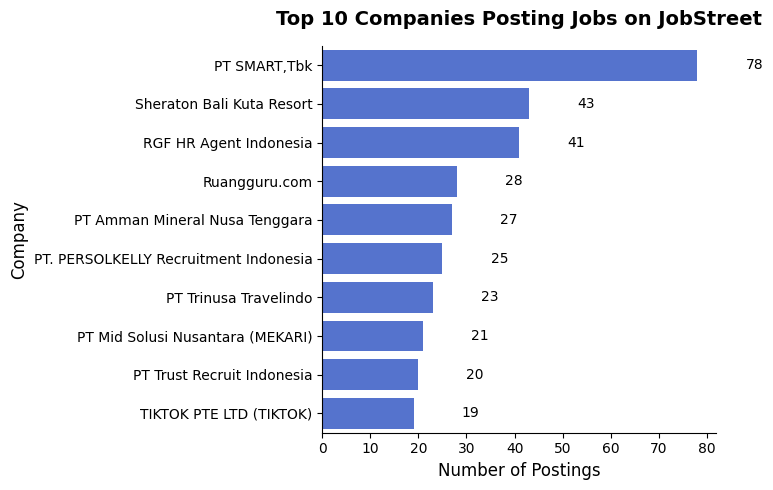

In [9]:
# Top 10 companies with most job postings
df_top10_company = df["Company"].value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(
    y=df_top10_company.index,
    x=df_top10_company.values,
    color="royalblue"
)

# Add value labels on bars
for i, val in enumerate(df_top10_company.values):
    plt.text(val + 10, i, str(val), va='center', fontsize=10)

# Labels and title
plt.ylabel("Company", fontsize=12)
plt.xlabel("Number of Postings", fontsize=12)
plt.title("Top 10 Companies Posting Jobs on JobStreet", fontsize=14, fontweight="bold", pad=15)

sns.despine()
plt.tight_layout()
plt.show()

**1. Categorization**

Plantation & Mining: PT SMART Tbk, PT Amman Mineral Nusa Tenggara, Asian Pulp and Paper

HR Agencies: RGF HR Agent Indonesia, PT PersolKelly

Service Sector: Sheraton Bali Kuta Resort, Ruangguru, PT Mid Solusi Nusantara, TikTok



---



**2. First Row – PT SMART Tbk**

The company PT SMART Tbk appears in the first row of the table with 74 job postings.

PT SMART Tbk operates in the palm oil industry and has been established since 1962.

In the previous year, the company reported a net profit of IDR 5.5 trillion.

No surprise they are actively hiring, as expansion and sustainability projects require more manpower.




---



**3. Second Row – Sheraton Bali Kuta Resort**

Honestly, I was quite surprised to see Sheraton Bali Kuta Resort ranked in the second position.

This is a 5-star hotel in Bali, beautifully located on 5.2 hectares of land.

Given its size and popularity as a global tourist destination, it makes sense that the resort needs a large workforce to maintain operations and guest services.




---




**4. Third Row – RGF HR Agent Indonesia**

In the third position, we find RGF HR Agent Indonesia.

This seems logical because many small to mid-sized companies rely on HR agencies for recruitment.

Outsourcing hiring to HR agencies is often more cost-effective and efficient, which explains their strong presence in job postings.

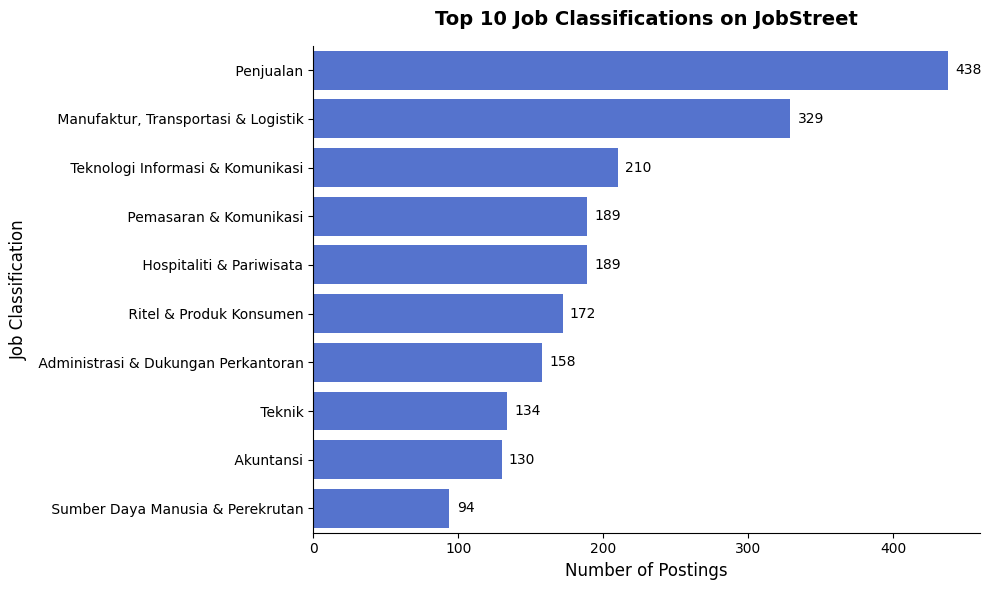

In [10]:
df_top10job = df["Classification"].value_counts().head(10).reset_index()
df_top10job.columns = [ "Classification", "Sum of Postings"]
df_top10job['Classification'] = df_top10job['Classification'].str.replace(
    r"\((.*)\)", r" \1", regex=True
)

plt.figure(figsize=(10, 6))

sns.barplot(
    data=df_top10job,
    y="Classification",
    x="Sum of Postings",
    color="royalblue"
)

# Add value labels
for i, val in enumerate(df_top10job["Sum of Postings"]):
    plt.text(val + 5, i, str(val), va="center", fontsize=10)

plt.ylabel("Job Classification", fontsize=12)
plt.xlabel("Number of Postings", fontsize=12)
plt.title("Top 10 Job Classifications on JobStreet", fontsize=14, fontweight="bold", pad=15)
sns.despine()
plt.tight_layout()
plt.show()

From the table above, it shows that “Penjualan” (Sales) is the top job classification among others.
However, the number of postings (106) only accounts for around 4% of the total dataset.
This indicates that there is a high variation in job classifications, and no single category dominates significantly.
Therefore, it may be necessary to merge or re-group some classifications to gain more meaningful insights.

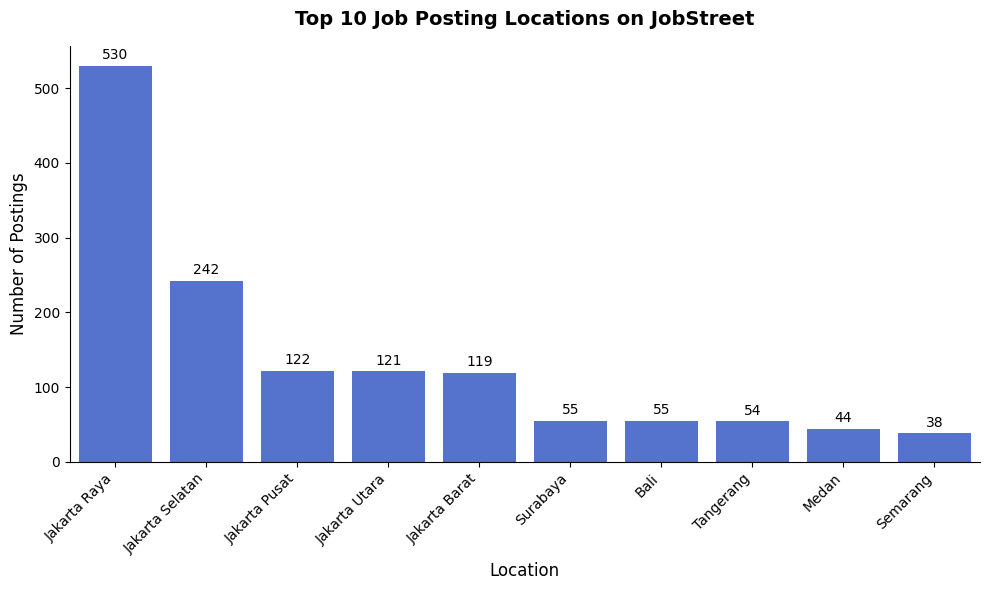

In [11]:
df_top10_location = df["Location"].value_counts().head(10)
# df_top10_location
plt.figure(figsize=(10,6))
sns.barplot(
    x=df_top10_location.index,
    y=df_top10_location.values,
    color="royalblue"  # one consistent color
)

# Add labels on top of bars
for i, val in enumerate(df_top10_location.values):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=10)

plt.xlabel("Location", fontsize=12)
plt.ylabel("Number of Postings", fontsize=12)
plt.title("Top 10 Job Posting Locations on JobStreet", fontsize=14, fontweight="bold", pad=15)
plt.xticks(rotation=45, ha="right")
sns.despine()
plt.tight_layout()
plt.show()

From the graph above, we can see that most job openings in Indonesia are concentrated in Jakarta.
Even within Jakarta itself, the city is divided into five regions, yet the majority of openings are still centered there.
This explains why many people from other regions migrate to Jakarta in search of better opportunities.
With more than 10 million inhabitants, Jakarta is currently the most densely populated city in Indonesia.

However, something is noticeably missing from this dataset.
We would logically expect to see significant job postings in manufacturing hubs such as Bekasi, Bogor, Cikarang, and Karawang, since these areas are known for having large industrial estates.
This gap might be due to Jobstreet’s search algorithm.
To improve accuracy, instead of relying only on “Any” or “Indonesia” as location filters, it may be better to create a list of major cities/industrial areas and perform separate searches to build a more complete database.

In [12]:
import folium
import pandas as pd
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

locations_coords = {
    "Jakarta Raya": {"lat": -6.2088, "lng": 106.8456},
    "Jakarta Selatan": {"lat": -6.2615, "lng": 106.8106},
    "Jakarta Utara": {"lat": -6.1380, "lng": 106.8823},
    "Jakarta Barat": {"lat": -6.1683, "lng": 106.7580},
    "Jakarta Pusat": {"lat": -6.1865, "lng": 106.8341},
    "Surabaya": {"lat": -7.2575, "lng": 112.7521},
    "Tangerang": {"lat": -6.1783, "lng": 106.6319},
    "Bali": {"lat": -8.4095, "lng": 115.1889},
    "Medan": {"lat": 3.5952, "lng": 98.6722},
    "Semarang": {"lat": -6.9667, "lng": 110.4167}
}

# Convert top 10 locations into DataFrame if it's still a Series
if isinstance(df_top10_location, pd.Series):
    df_top10_location = df_top10_location.reset_index()
    df_top10_location.columns = ["Location", "Count"]

# Add Latitude and Longitude from dictionary
df_top10_location[["Latitude", "Longitude"]] = df_top10_location["Location"].apply(
    lambda loc: pd.Series(locations_coords.get(loc, {"lat": None, "lng": None}))
)

# Rename for clarity
df_top10_location.rename(columns={"lat": "Latitude", "lng": "Longitude"}, inplace=True)

df_top10_location

,Location,Count,Latitude,Longitude
0,Jakarta Raya,530,-6.2088,106.8456
1,Jakarta Selatan,242,-6.2615,106.8106
2,Jakarta Pusat,122,-6.1865,106.8341
3,Jakarta Utara,121,-6.1380,106.8823
4,Jakarta Barat,119,-6.1683,106.7580
5,Surabaya,55,-7.2575,112.7521
6,Bali,55,-8.4095,115.1889
7,Tangerang,54,-6.1783,106.6319
8,Medan,44,3.5952,98.6722
9,Semarang,38,-6.9667,110.4167


In [13]:
indonesia_coordinate = [-0.7893, 113.9213]
site_map = folium.Map(location=indonesia_coordinate, zoom_start=5)
site_map

In [14]:
# Initialize the map centered on Indonesia
site_map = folium.Map(location=indonesia_coordinate, zoom_start=6)

# Add circles and labels for each location
for lat, lng, label, count in zip(
    df_top10_location['Latitude'],
    df_top10_location['Longitude'],
    df_top10_location['Location'],
    df_top10_location['Count']
):
    print([lat, lng])

    # Circle marker
    circle = folium.Circle(
        [lat, lng],
        radius=15000,
        color='#d35400',
        fill=True,
        fill_opacity=0.4,
        popup=f"{label}: {count} postings"
    )

    # Text label marker (with job count included)
    marker = folium.map.Marker(
        [lat, lng],
        icon=DivIcon(
            icon_size=(150, 30),
            icon_anchor=(0, 0),
            html=f'<div style="font-size: 12px; color:#d35400;"><b>{label} ({count})</b></div>',
        )
    )

    site_map.add_child(circle)
    site_map.add_child(marker)

site_map

[-6.2088, 106.8456]
[-6.2615, 106.8106]
[-6.1865, 106.8341]
[-6.138, 106.8823]
[-6.1683, 106.758]
[-7.2575, 112.7521]
[-8.4095, 115.1889]
[-6.1783, 106.6319]
[3.5952, 98.6722]
[-6.9667, 110.4167]


I used the Folium library to visualize how dense job openings are in Jakarta.
However, it is quite difficult to perceive the exact number of openings at a glance.
To get a clearer picture, the map requires zooming in for more detail.

Moreover, the map reveals that on Sumatra Island, only Medan appears with job openings in this dataset, while other islands show no job postings at all.
This suggests that the data may be incomplete or that certain regions are underrepresented on the Jobstreet platform.

In [15]:
df = df[df['Unit']=='month']

In [16]:
max_salary = df['Salary_High'].max()
min_salary = df['Salary_Low'].min()

print(f"Maximum Salary: {max_salary}")
print(f"Minimum Salary: {min_salary}")

Maximum Salary: 65000000.0
Minimum Salary: 666.0


In [17]:
df_max = df[df['Salary_High'] == max_salary]
df_max

,Title,Classification,Company,Location,Posting,Salary,Description,Salary_Low,Salary_High,Unit,Currency
628,Senior Sales Manager,(Perbankan & Layanan Finansial),Tdecision Malaysia Sdn Bhd,Jakarta Raya,26 hari yang lalu,"Rp 45,000,000 – Rp 65,000,000 per month",Lead a dynamic sales team at a leading financi...,45000000.0,65000000.0,month,IDR


The value Rp 666/month is clearly unrealistic for Indonesia and is an outlier (likely a data entry error or scraping noise). Filtering it out with quantile-based trimming is a good way to clean the data.

<Axes: xlabel='Salary_Low', ylabel='Count'>

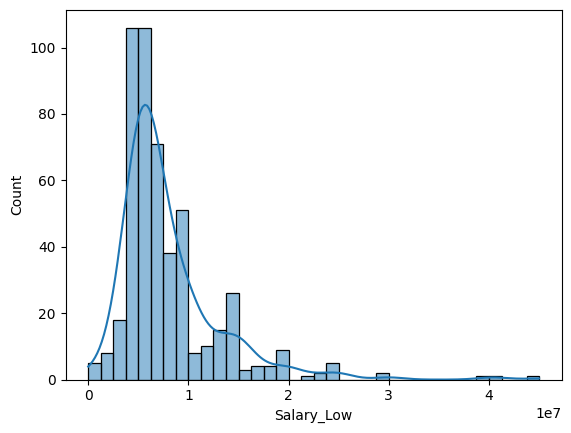

In [18]:
sns.histplot(df['Salary_Low'], kde=True)

In [19]:
q = df['Salary_Low'].quantile(0.01)
df_min = df[df['Salary_Low'] >= q]
min_salary = df_min['Salary_Low'].min()
min_salary

1500000.0

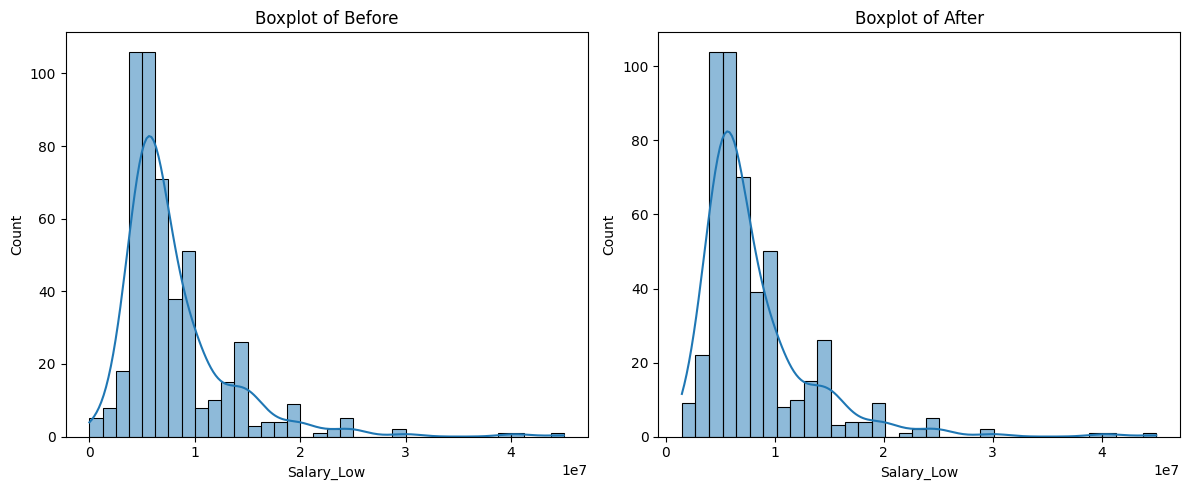

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=df, x='Salary_Low', ax=ax[0], kde=True)
ax[0].set_title('Boxplot of Before')

sns.histplot(data=df_min, x='Salary_Low', ax=ax[1], kde=True)
ax[1].set_title('Boxplot of After')

plt.tight_layout()
plt.show()


After filtered out the bottom 1% (including the Rp 666/month outlier):

The histogram shifts slightly to the right → because now the lowest salary is around ≥ Rp 1,000,000/month.

This makes the distribution more realistic for Indonesia, since it’s unlikely that anyone earns below that value.

By trimming, data essentially removed unrealistic noise, so the curve better reflects actual market salaries.

In [21]:
df_min = df[df['Salary_Low'] == min_salary]
df_min

,Title,Classification,Company,Location,Posting,Salary,Description,Salary_Low,Salary_High,Unit,Currency
2072,Sales Admin Intern,(Administrasi & Dukungan Perkantoran),PT Terra Drone Indonesia,Jakarta Pusat,3 hari yang lalu,Rp 1.500.000 – Rp 2.000.000 per month,Sales Admin Intern at Terra Drone: handle data...,1500000.0,2000000.0,month,IDR


An internship or entry-level role like Sales Admin Intern is often:
Filled by students or fresh graduates starting their careers.
Paid in the range of Rp 1.5 – 2.0 million/month, which makes sense as a stipend rather than a full salary. Much more realistic than the Rp 666/month anomaly you spotted earlier.

In [22]:
df['Average_salary'] = (df['Salary_High'] + df['Salary_Low']) / 2

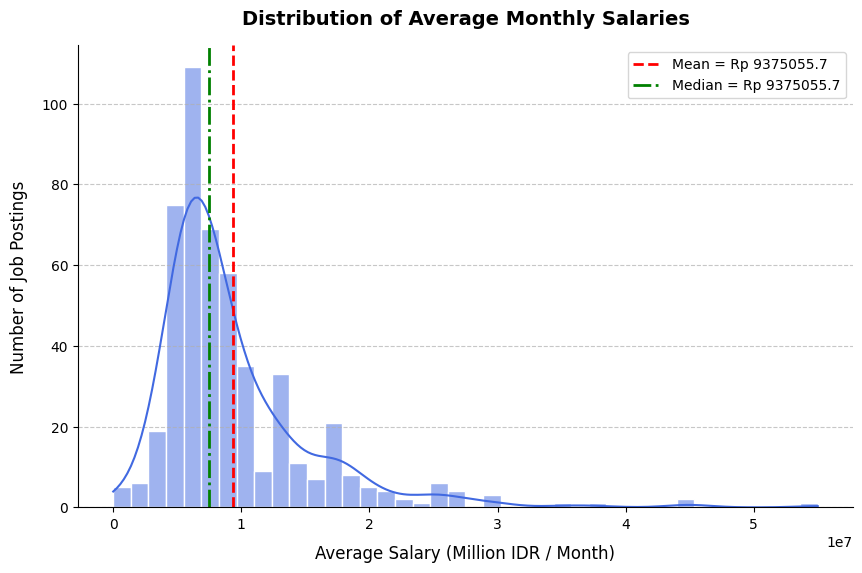

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(df['Average_salary'], bins=40, kde=True, color="royalblue", edgecolor="white")
plt.xlabel("Average Salary (Million IDR / Month)", fontsize=12, labelpad=10)
plt.ylabel("Number of Job Postings", fontsize=12, labelpad=10)
plt.title("Distribution of Average Monthly Salaries", fontsize=14, fontweight="bold", pad=15)
plt.axvline(df['Average_salary'].mean(), color="red", linestyle="--", linewidth=2, label=f"Mean = Rp {df['Average_salary'].mean():.1f}")
plt.axvline(df['Average_salary'].median(), color="green", linestyle="-.", linewidth=2, label=f"Median = Rp {df['Average_salary'].mean():.1f}")

plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
sns.despine()
plt.show()

**🔎 Insight**



* The overall salary distribution is right-skewed, suggesting that most jobs
offer salaries below 10 million IDR.

* The mean and median (~9.3 million IDR) are close to the peak of the graph, indicating that while some outliers exist, the data remains relatively normal.

* Paying employees around 9.3 million IDR is common this year, based on both the mean and median values.

* Beyond 20 million IDR, the salary count increases significantly, likely representing positions at the senior or managerial level.

* Based on graph it shows that most frequent job lies on 5-10  Millions IDR

 What the Graph Shows

Type: Histogram + Kernel Density Estimation (KDE)

X-axis (horizontal): Average monthly salary (in Million IDR)

Y-axis (vertical): Number of job postings (frequency)

Vertical Lines:

Green dashed line = Median (~ Rp 9.37 juta / month)

Red dashed line = Mean (~ Rp 9.37 juta / month — same as median in this case, maybe due to rounding)




---

📊 Observations

1. Most job postings cluster around 5 – 10 million IDR/month

The highest bars (peak) are between ~Rp 5 juta – Rp 10 juta.

This suggests that the majority of jobs advertised in the dataset are in this salary range.



2. Right-skewed distribution (long tail to the right)

Some jobs offer salaries > Rp 20 juta/month, even up to Rp 50 juta.

These are outliers (likely senior positions, expatriate roles, or specialized jobs).

Because of these outliers, the mean is slightly higher than the median, but here both values are almost identical.



3. Median ≈ Mean (~Rp 9.3 juta)

Normally in right-skewed data, the mean > median.

Here, the difference is minimal, meaning outliers don’t drastically shift the average.

Suggests a relatively balanced dataset despite a few extreme values.



4. Most postings are below Rp 15 juta/month

Beyond 15 juta, the frequency drops sharply.

Indicates that high-paying jobs are rare compared to mid-range salaries.





---

📌 Interpretation / Insights

The Indonesian job market (based on this dataset) concentrates heavily in the middle salary range (5–10 juta/month).

High-paying jobs exist but are very few, creating a right tail in the distribution.

For job seekers: most opportunities will fall within ~Rp 7–12 juta/month.

For employers: if offering > Rp 15 juta, postings will stand out since they are uncommon.



---

## Step 3 : Summary




1. Salary Disclosure: 80.43% of postings lack salary information, likely due to companies protecting compensation/bonus secrecy for competitiveness.

2. Top Hiring Companies: PT SMART, Tbk; Sheraton Kuta Bali Resort; and RGF HR Agent Indonesia.

3. Job Classification: Current categories are broad (~4% share each). A deeper, more specific classification is needed for meaningful insights.

4. Location Trends: Most openings are centered in Jakarta (the most populated city). Industrial hubs like Bekasi and Cikarang are underrepresented—possibly due to Jobstreet’s search algorithm.

5. Salary Range: Lowest posting is IDR 1.5M (Sales Admin Intern); highest is IDR 65M (Senior Sales Manager).

6. Salary Frequency: Most frequent range is IDR 5M–10M/month.
